### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
# 1. URL 찾기

In [ ]:
url = "http://corners.gmarket.co.kr/Bestsellers"

In [ ]:
# 2. request > response : str(html)

In [ ]:
response = requests.get(url)
response

<Response [200]>

In [ ]:
# 3. bs > DataFrame

In [ ]:
dom = BeautifulSoup(response.text, "html.parser")

In [ ]:
# select items
# elements = dom.select("#gBestWrap > div > div:nth-child(5) > div > ul > li")
elements = dom.select("#gBestWrap > div.best-list > ul > li")
len(elements)

200

In [ ]:
element = elements[0]

In [ ]:
# select item data
data = {
    "title": element.select_one(".itemname").text,
    "link": element.select_one(".itemname").get("href"),
    "img": element.select_one("img").get("data-original"),
    "o_price": element.select_one(".o-price").text,
    "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
}
data

{'title': '[우고래빗]갓구운 캐슈넛 1kg (500g+500g) 23년 햇상품',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=3107171643&ver=20240327',
 'img': None,
 'o_price': '정가21,300원',
 's_price': '할인가14,900원 30%'}

In [ ]:
# make DataFrame
datas = []
for element in elements:
    datas.append({
        "title": element.select_one(".itemname").text,
        "link": element.select_one(".itemname").get("href"),
        "img": "http:" + element.select_one("img").get("src"),
        "o_price": element.select_one(".o-price").text,
        "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
    })
df = pd.DataFrame(datas)
df.tail(3)

,title,link,img,o_price,s_price
197,[아침농산]2023년 햅쌀 농부의아침 쌀10kg 백미 상등급,http://item.gmarket.co.kr/Item?goodscode=48482...,http://gdimg.gmarket.co.kr/484828506/still/300...,"정가39,300원","할인가24,750원 37%"
198,[월튼키즈]10+5%쿠폰할인/24봄신상베스트특가전~82%/바람막이/상하복/원피스 외...,http://item.gmarket.co.kr/Item?goodscode=22691...,http://gdimg.gmarket.co.kr/226919468/still/300...,"정가36,300원","할인가10,900원 69%"
199,[리베레츠](10%+10%쿠폰) 홈쇼핑 봄여름 간절기 신상 자켓/트렌치/팬츠/원피스...,http://item.gmarket.co.kr/Item?goodscode=34353...,http://gdimg.gmarket.co.kr/3435332713/still/30...,"정가99,600원","할인가29,900원 69%"


In [ ]:
df.head()

,title,link,img,o_price,s_price
0,[우고래빗]갓구운 캐슈넛 1kg (500g+500g) 23년 햇상품,http://item.gmarket.co.kr/Item?goodscode=31071...,http://gdimg.gmarket.co.kr/3107171643/still/30...,"정가21,300원","할인가14,900원 30%"
1,[스파클]20%+10% 스파클생수 2L 30병/쿠폰가 12700원 (도착보장/무라벨생수),http://item.gmarket.co.kr/Item?goodscode=15106...,http://gdimg.gmarket.co.kr/1510637585/still/30...,"정가24,100원","할인가18,130원 24%"
2,[버거킹](버거킹) 더블비프불고기버거+치즈버거+코카콜라 (L),http://item.gmarket.co.kr/Item?goodscode=36164...,http://gdimg.gmarket.co.kr/3616492756/still/30...,"정가10,700원","할인가6,500원 39%"
3,[네추럴라이즈](캐나다직수입)멀티비타민 꾸미 츄어블 어린이 키즈 종합비타민 구미 젤...,http://item.gmarket.co.kr/Item?goodscode=27725...,http://gdimg.gmarket.co.kr/2772504992/still/30...,"정가24,400원","할인가22,340원 8%"
4,[농협안심한우]농협안심한우 1등급 한우 등심 300g+300g,http://item.gmarket.co.kr/Item?goodscode=35948...,http://gdimg.gmarket.co.kr/3594829525/still/30...,"정가53,430원","할인가29,920원 44%"


In [ ]:
# 4. download image

In [ ]:
# make directory
import os

if not os.path.exists("data"):
    os.makedirs("data")

In [ ]:
%ls data

000.png  001.png  002.png  003.png  004.png  test.png


In [ ]:
img_link = df.loc[0, "img"]
print(img_link)

http://gdimg.gmarket.co.kr/3107171643/still/300?ver=1695779289


In [ ]:
# download image

In [ ]:
response = requests.get(img_link)
response

<Response [200]>

In [ ]:
with open("data/test.png", "wb") as file:
    file.write(response.content)

In [ ]:
%ls data

000.png  001.png  002.png  003.png  004.png  test.png


In [ ]:
from PIL import Image as pil

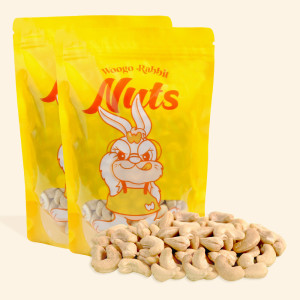

In [ ]:
pil.open("data/test.png")

In [ ]:
# 5개의 아이템 이미지 다운로드
for idx, data in df[:5].iterrows():
    filename = "0" * (3 - len(str(idx))) + str(idx)
    print(idx, end=" ")
    response = requests.get(data.img)
    with open(f"data/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 

In [ ]:
%ls data

000.png  001.png  002.png  003.png  004.png  test.png


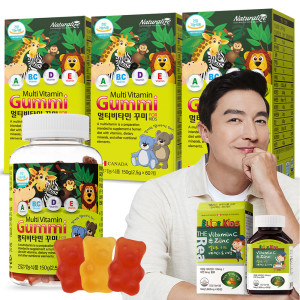

In [ ]:
pil.open("data/003.png")